# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Read the csv data into a pandas dataframe and display the first 5 samples

In [2]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [4]:
df.shape

(414, 8)

### What are the features available in the dataset?

In [5]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [6]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [7]:
# Drop the target column
X = df.drop(["Y house price of unit area"], axis=1)
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


### Group feature(s) as independent features in y

In [8]:
y = df["Y house price of unit area"]
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

### Split the dataset into train and test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Choose the model (Linear Regression)

In [10]:
model = LinearRegression()

### Create an Estimator object

In [11]:
lr = LinearRegression()

### Train the model

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [13]:
y_pred = lr.predict(X_test)
y_pred[:10]

array([47.04645871, 40.40783016, 43.37463978, 39.20600382, 26.62817953,
       45.8923956 , 44.33888897, 46.74448468, 24.43235155, 55.06258487])

### Display the coefficients

In [14]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)
print("Features:", X.columns.tolist())

Intercept: -12824.256569928451
Coefficients: [-5.61695287e-03  5.40743502e+00 -2.67827999e-01 -4.81543315e-03
  1.08114445e+00  2.26048799e+02 -3.01254914e+01]
Features: ['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


### Find how well the trained model did with testing data

In [15]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.6745228670350703
Mean Squared Error: 54.601960673379956


### Plot House Age Vs Price
#### Hint: Use regplot in sns

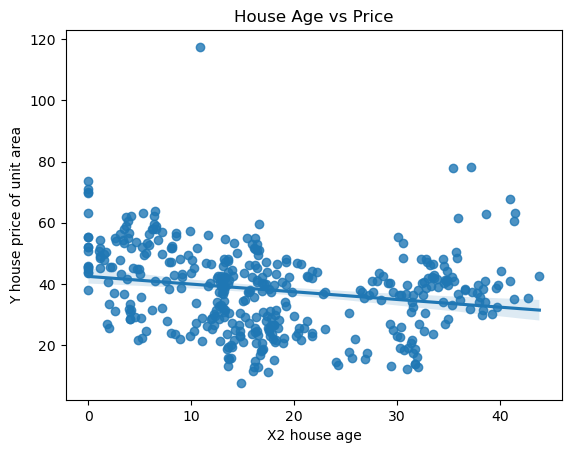

In [16]:
sns.regplot(x=df["X2 house age"], y=df["Y house price of unit area"])
plt.title("House Age vs Price")
plt.show()

### Plot Distance to MRT station Vs Price

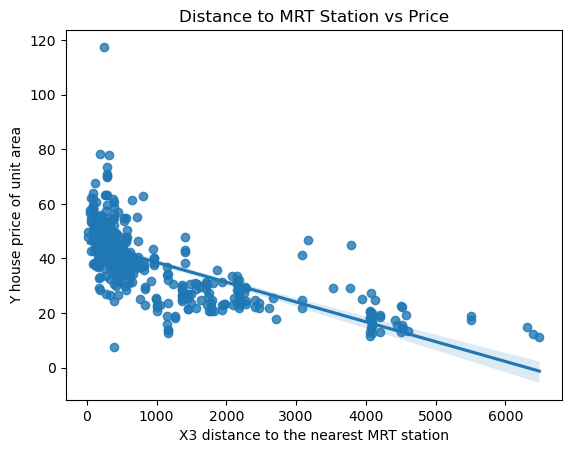

In [17]:
sns.regplot(x=df["X3 distance to the nearest MRT station"], y=df["Y house price of unit area"])
plt.title("Distance to MRT Station vs Price")
plt.show()

### Plot Number of Convienience Stores Vs Price

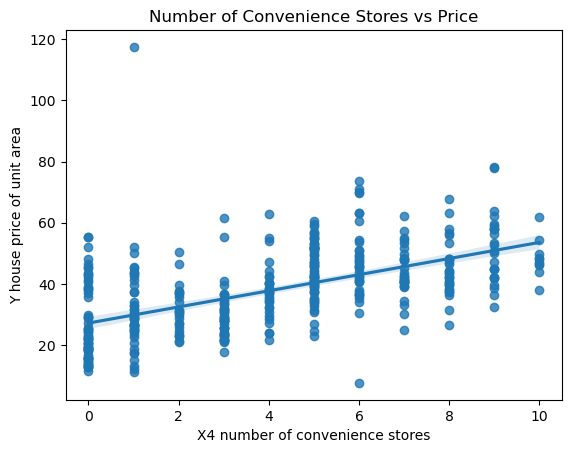

In [18]:
sns.regplot(x=df["X4 number of convenience stores"], y=df["Y house price of unit area"])
plt.title("Number of Convenience Stores vs Price")
plt.show()
